In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [21]:
car_reg = pd.read_csv('vehicle_registration_by_municipality.csv')
car_reg.head()

CSDUID        CSD  Period IndicatorSummaryDescription Vehicle Type  \
0  4807044  Sedgewick    2005       Vehicle Registrations         Cars   
1  4807044  Sedgewick    2006       Vehicle Registrations         Cars   
2  4807044  Sedgewick    2007       Vehicle Registrations         Cars   
3  4807044  Sedgewick    2008       Vehicle Registrations         Cars   
4  4807044  Sedgewick    2009       Vehicle Registrations         Cars   

   UnitOfMeasure  OriginalValue  
0            NaN            376  
1            NaN            372  
2            NaN            386  
3            NaN            396  
4            NaN            341

In [23]:
car_reg.isna().sum()

CSDUID                             0
CSD                                0
Period                             0
IndicatorSummaryDescription        0
Vehicle Type                       0
UnitOfMeasure                  41991
OriginalValue                      0
dtype: int64

In [25]:
car_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41991 entries, 0 to 41990
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CSDUID                       41991 non-null  int64  
 1   CSD                          41991 non-null  object 
 2   Period                       41991 non-null  int64  
 3   IndicatorSummaryDescription  41991 non-null  object 
 4   Vehicle Type                 41991 non-null  object 
 5   UnitOfMeasure                0 non-null      float64
 6   OriginalValue                41991 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.2+ MB


In [27]:
car_reg.shape

(41991, 7)

In [28]:
car_reg = car_reg.drop(columns=['CSDUID', 'IndicatorSummaryDescription', 'UnitOfMeasure'])

In [31]:
car_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41991 entries, 0 to 41990
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CSD            41991 non-null  object
 1   Period         41991 non-null  int64 
 2   Vehicle Type   41991 non-null  object
 3   OriginalValue  41991 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


In [33]:
column_map = {'CSD':'CSD','Period':'Period','Vehicle Type':'Vehicle_Type','OriginalValue':'Total_Vehicle_Registration_Count'}

In [37]:
car_reg.rename(columns=column_map, inplace=True)
car_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41991 entries, 0 to 41990
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   CSD                               41991 non-null  object
 1   Period                            41991 non-null  int64 
 2   Vehicle_Type                      41991 non-null  object
 3   Total_Vehicle_Registration_Count  41991 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


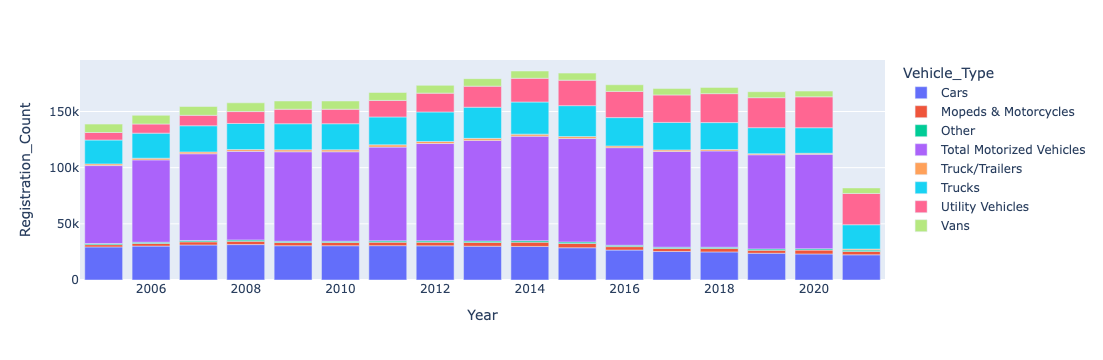

In [208]:
Red_deer_reg = car_reg.query("Municipality == 'Red Deer'")
fig = px.bar(Red_deer_reg, x='Year', y='Registration_Count',
             hover_data=['Registration_Count'], color='Vehicle_Type')
fig.show()

In [39]:
Municipality_list = car_reg['Municipality'].unique()
Municipality_list

KeyError: 'Municipality'

In [41]:
aqi_df = pd.read_csv('Air_Quality_Index_by_Municipality.csv')
aqi_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Air_Quality_Index_by_Municipality.csv'

In [235]:
aqi_municipality_list = aqi_df['CSD'].unique()
aqi_municipality_list

array(['Red Deer', 'Fort Saskatchewan', 'Edmonton', 'Lethbridge',
       'Newell County', 'Caroline', 'Airdrie', 'Medicine Hat',
       'Taber, M.D.', 'Foothills County', 'Calgary',
       'Northern Sunrise County', 'Spirit River No. 133',
       'Grande Prairie', 'Brazeau County', 'Parkland County',
       'Strathcona County', 'Sturgeon County', 'St. Albert', 'Canmore',
       'Grande Prairie County No. 1', 'Cold Lake', 'Bonnyville No. 87',
       'St. Paul County No. 19', 'Peace No. 135', 'Wood Buffalo',
       'Bruderheim', 'Improvement District No. 13 Elk Island',
       'Leduc County', 'Beaverlodge', 'Lamont County',
       'Yellowhead County'], dtype=object)

In [231]:
car_reg_update = car_reg[car_reg['Municipality'].isin(aqi_municipality_list)]
car_reg_update['Municipality'].unique()
car_reg_update['Municipality'].describe()

count         4050
unique          30
top       Red Deer
freq           135
Name: Municipality, dtype: object

In [45]:
car_reg_total = car_reg[car_reg['Vehicle_Type'].isin(['Total Motorized Vehicles'])]
car_reg_total

CSD  Period              Vehicle_Type  \
15864            Sedgewick    2005  Total Motorized Vehicles   
15865            Sedgewick    2006  Total Motorized Vehicles   
15866            Sedgewick    2007  Total Motorized Vehicles   
15867            Sedgewick    2008  Total Motorized Vehicles   
15868            Sedgewick    2009  Total Motorized Vehicles   
...                    ...     ...                       ...   
20834  Not Stated, Alberta    2016  Total Motorized Vehicles   
20835  Not Stated, Alberta    2017  Total Motorized Vehicles   
20836  Not Stated, Alberta    2018  Total Motorized Vehicles   
20837  Not Stated, Alberta    2019  Total Motorized Vehicles   
20838  Not Stated, Alberta    2020  Total Motorized Vehicles   

       Total_Vehicle_Registration_Count  
15864                              1743  
15865                              1733  
15866                              1805  
15867                              1827  
15868                              1846  
...                                 ...  
20834                                 0  
20835                                 0  
20836                                 0  
20837                                 0  
20838                                 0  

[4975 rows x 4 columns]

In [47]:
car_reg_total.to_csv('cleaned_vehicle_registration.csv', index=False)
total_reg = pd.read_csv('cleaned_vehicle_registration.csv')

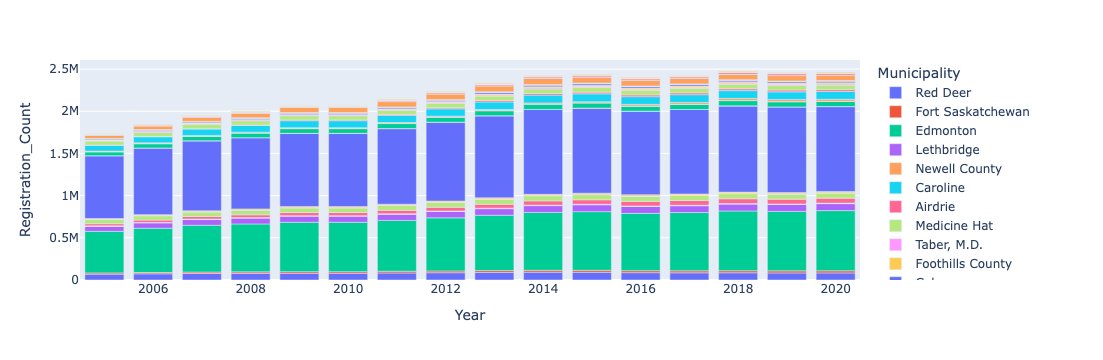

In [222]:
fig = px.bar(total_reg, x='Year', y='Registration_Count',
             hover_data=['Registration_Count'], color='Municipality')
fig.show()

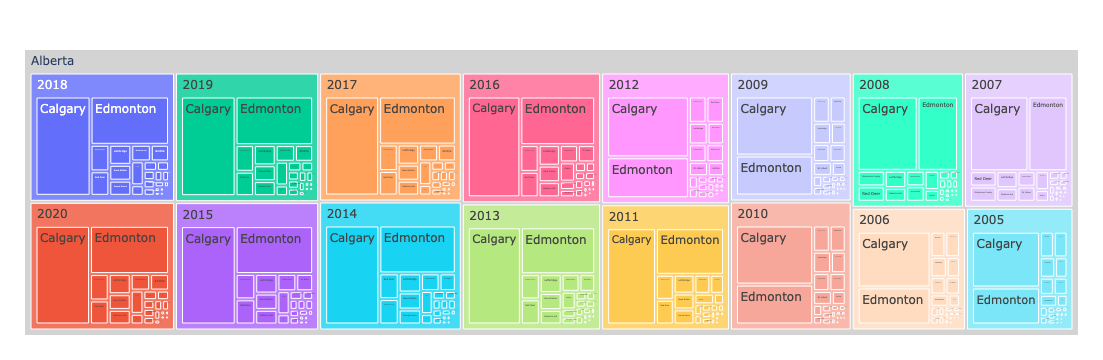

In [224]:
fig = px.treemap(total_reg, path=[px.Constant("Alberta"), 'Year', 'Municipality'], values='Registration_Count')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()